# Linear Regression (MACS 30100)
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), January 2018
This Jupyter notebook is an adaptation of the QuantEcon Lecture, "[Linear Regression in Python](https://lectures.quantecon.org/py/ols.html)" by [Natasha Watkins](https://github.com/natashawatkins). The code in this Jupyter notebook was written using Python 3.6. It uses data files `maketable1.dta`, `maketable2.dta`, and `maketable4.dta`. For the code to run properly, you will either need to have access to the internet or you should have the data file in the same folder as the Jupyter notebook file. Otherwise, you will have to change the respective lines of the code that read in the data to reflect the location of that data.

## 1. An example analysis: Acemoglu, et al (2001)
The research question of the paper [AJR01] is to determine whether or not differences in institutions can help to explain observed economic outcomes. How do we measure institutional differences and economic outcomes? In this paper:
* economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates,
* institutional differences are proxied by an index of protection against expropriation on average over 1985-95, constructed by the [Political Risk Serivces Group](https://www.prsgroup.com/).

These variables and other data used in the paper are available for download on [Daron Acemoglu’s webpage](https://economics.mit.edu/faculty/acemoglu/data/ajr2001).

## 2. Initial data description
We will use pandas’ `.read_stata()` function to read in data contained in the `.dta` files to dataframes.

In [1]:
import pandas as pd

df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/' +
                    'raw/master/ols/maketable1.dta')
# The pandas DataFrame.head() method returns the first N rows of a DataFrame
# with column headings and index numbers. The default is N=5.
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1["avexpr"].mean()

7.066490173339844

In [ ]:
df1["avexpr"].mean

Let’s use a scatterplot to see whether any obvious relationship exists between GDP per capita and the protection against expropriation index.

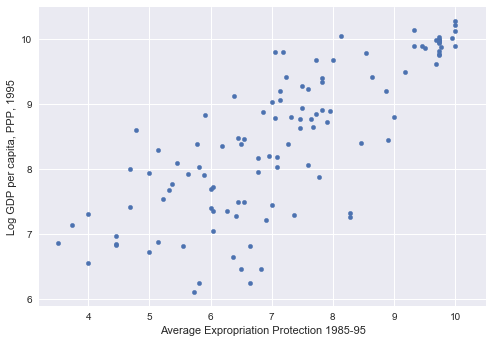

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.xlabel(r'Average Expropriation Protection 1985-95')
plt.ylabel(r'Log GDP per capita, PPP, 1995')
plt.xlim((3.2, 10.5))
plt.ylim((5.9, 10.5))
plt.show()

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita. Specifically, if higher protection against expropriation is a measure of institutional quality, then better institutions appear to be positively correlated with better economic outcomes (higher GDP per capita).

## 3. Running a linear regression
Given the plot above, choosing a linear model to describe this relationship seems like a reasonable assumption.

We can write a model as,
$$logpgp95_i = \beta_0 + \beta_1 avexpr_i + u_i $$
where:
* $\beta_0$ is the intercept of the linear trend line on the $y$-axis
* $\beta_1$ is the slope of the linear trend line, representing the marginal effect of protection against risk on log GDP per capita
* $u_i$ is a random error term (deviations of observations from the linear trend due to factors not included in the model)

Visually, this linear model involves choosing a straight line that best fits the data, as in the following plot (Figure 2 in [AJR01]).

In [34]:
import numpy as np
df1.dropna?
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])
df1_subset

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
5,AUS,98.000000,1.0,9.318182,9.897972,7.0,7.0,10.0,7.0,8.550000,2.145931,-0.170788,1.0
6,AUT,100.000000,0.0,9.727273,9.974877,NaN,NaN,NaN,NaN,NaN,NaN,-0.343900,NaN
9,BEL,100.000000,0.0,9.681818,9.992871,NaN,NaN,NaN,NaN,NaN,NaN,-0.179127,NaN
11,BFA,0.000000,1.0,4.454545,6.845880,3.0,1.0,0.0,1.0,280.000000,5.634789,-3.540459,1.0
12,BGD,0.000000,1.0,5.136364,6.877296,7.0,2.0,0.0,1.0,71.410004,4.268438,-2.063568,1.0
13,BGR,100.000000,0.0,8.909091,8.457443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,BHR,0.000000,1.0,8.000000,9.685953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


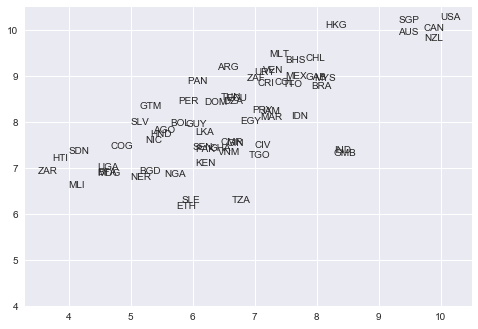

In [36]:
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

plt.scatter(X, y, marker = '')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))
plt.xlim([3.3,10.5])
plt.ylim([4,10.5])
#How get these limits
plt.show()

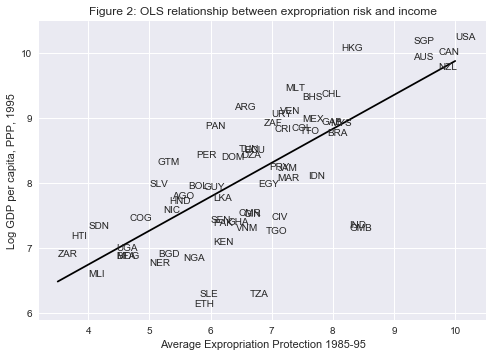

In [26]:
import numpy as np

# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])

# Use only 'base sample' for plotting purposes (smaller sample)
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlim([3.3,10.5])
plt.ylim([4,10.5])
plt.xlabel('Average Expropriation Protection 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.xlim((3.2, 10.5))
plt.ylim((5.9, 10.5))
plt.title('Figure 2: OLS relationship between expropriation risk and income')
plt.show()

The most common technique to estimate the parameters (ββ‘s) of the linear model is Ordinary Least Squares (OLS). As the name implies, an OLS model is solved by finding the parameters that minimize the sum of squared residuals.
$$ \hat{\beta}_{OLS} = \beta : \quad \min_{\beta}\: u(X|\beta_0,\beta_1)^T \: u(X|\beta_0,\beta_1) $$

where $\hat{u}_i$ is the difference between the dependent variable observation $logpgp95_i$ and the predicted value of the dependent variable $\beta_0 + \beta_1 avexpr_i$. To estimate the constant term $\beta_0$, we need to add a column of 1’s to our dataset (consider the equation if $\beta_0$ was replaced with $\beta_0 x_i$ where $x_i=1$).

In [37]:
df1['const'] = 1

Now we can construct our model using the `statsmodels` module and the `OLS` method. We will use `pandas` DataFrames with `statsmodels`. However, standard arrays can also be used as arguments.

In [38]:
# Ignore the warning that comes up. Most issue boards suggest that this module is not
# really depreciated
import statsmodels.api as sm

reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')
type(reg1)

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels.regression.linear_model.OLS

In [53]:
reg2 = sm.OLS(endog = df1['logpgp95'], exog = df1['avexpr'], missing = 'drop', hasconst = True)
results = reg2.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       1.014
Model:                            OLS   Adj. R-squared:                  1.014
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 24 Jan 2018   Prob (F-statistic):                nan
Time:                        12:27:29   Log-Likelihood:                -395.52
No. Observations:                 111   AIC:                             793.0
Df Residuals:                     110   BIC:                             795.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avexpr              0        nan        nan        n

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model
/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1440: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


In [54]:
sm.OLS?

So far we have simply constructed our model. The `statsmodels.regression.linear_model.OLS` is simply an object specifying dependent and independent variables, as well as instructions about what to do with missing data. We need to use the `.fit()` method to obtain OLS parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$. This method calculates the OLS coefficients according to the minimization problem,
$$ \hat{\beta}_{OLS} = \beta : \quad \min_{\beta}\: u(X|\beta_0,\beta_1)^T \: u(X|\beta_0,\beta_1) $$

In [39]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

We now have the fitted regression model stored in `results` (see [statsmodels.regression.linear_model.RegressionResults](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html)). The `results` from the `reg1.fit()` command is a regression results object with a lot of information, similar to the results object of the `scipy.optimize.minimize()` function we worked with in the MLE and GMM notebooks.

To view the OLS regression results, we can call the `.summary()` method.

[Note that an observation was mistakenly dropped from the results in the original paper (see the note located in maketable2.do from Acemoglu’s webpage), and thus the coefficients differ slightly.]

In [40]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           4.16e-24
Time:                        12:17:52   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

## 4. Interpreting results and output
From our results, we see that:
* the intercept $\hat{\beta}_0=4.63$ (interpretation?)
* the slope $\hat{\beta}_1=0.53$ (interpretation?)
* the positive $\hat{\beta}_1>0$ parameter estimate implies that protection from expropriation has a positive effect on economic outcomes, as we saw in the figure.
* How would you quantitatively interpret the $\hat{\beta}_1$ coefficient?
* What do the standard errors on the coefficients tell you?
* The p-value of 0.000 for $\hat{\beta}_1$ implies that the effect of institutions on GDP is statistically significant (using $p < 0.05$ as a rejection rule)
* The R-squared value of 0.611 indicates that around 61% of variation in log GDP per capita is explained by protection against expropriation

Using our parameter estimates, we can now write our estimated relationship as
$$ \hat{logpgp95}_i = 4.63 + 0.53 avexpr_i $$

This equation describes the line that best fits our data, as shown in Figure 2. We can use this equation to predict the level of log GDP per capita for a value of the index of expropriation protection.

### 4.1 Analysis of variance (ANOVA) output
The results `.summary()` method provides a lot of regression output. And the `.RegressionResults` object has much more as evidenced in the help page [statsmodels.regression.linear_model.RegressionResults](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

* The `Df Residuals: 109` displays the degrees of freedom from the residual variance calculation. This equals the number of observations minus the number of regression coefficients, `N-p=111-2`. This is accessed with `results.df_resid`.
* The `Df Model: 1` displays the degrees of freedom from the model variance calculation or from the regressors. This equals the number of regression coefficients minus one, `p-1=2-1`. This is accessed with `results.df_model`.
* One can specify robust standard errors in their regression. The robust option is specified in the `.fit()` command. You can specify three different types of robust standard errors using the `.fit(cov_type='HC1')`, `.fit(cov_type='HC2')`, or `.fit(cov_type='HC3')` options.
* You can do clustered standard errors if you have groups labeled in a variable called `mygroups` by using the `.fit(cov_type='cluster', cov_kwds={'groups': mygroups})`.
* R-squared is a measure of fit of the overall model. It is $R^2=1 - SSR/SST$ where $SST$ is the total variance of the dependent variable (total sum of squares), and $SSR$ is the sum of squared residuals (variance of the residuals). Another expresion is the sum of squared predicted values over the total sum of squares $R^2= SSM/SST$, where $SSM$ is the sum of squared predicted values. This is accessed with `results.rsquared`.
* Adjusted R-squared is a measure of fit of the overall model that penalizes extra regressors. A property of the R-squared in the previous bullet is that it always increases as you add more explanatory variables. This is accessed with `results.rsquared_adj`.

### 4.2 F-test and log likelihood
* The F-statistic is the statistic from an F-test of the joint hypothesis that all the coefficients are equal to zero. The value of the F-statistic is distributed according to the F-distribution $F(d1,d2)$, where $d1=p-1$ and $d2=N-p$.
* The Prob (F-statistic) is the probability that the null hypothesis of all the coefficients being zero is true. In this case, it is really small.
* Log-likelihood is the sum of the log pdf values of the errors given their being normally distributed with mean 0 and standard deviation implied by the OLS estimates.

### 4.3 Inference on individual parameters
* The estimated coefficients of the linear regression are reported in the `results.params` vector object (pandas Series).
* The standard error on each estimated coefficient is reported in the summary results column entitled `std err`. These standard errors are reported in the `results.bse` vector object (pandas Series).
* The "t" column is the $t$ test statistic. It is the value in the support of the students-T distribution that is equivalent to the estimated coefficient if the null-hypothesis were true that the estimated coefficient were 0.
* The reported p-value is the probability of a two-sided t-test that gives the probability that the estimated coefficient is greater than its estimated value if the true value were 0. A more intuitive interpretation is the probability of seeing that estimated value if the null hypothesis were true. We usually reject the null hypothesis if the p-value is lower than 0.05.
* The summary results report the 95% two-sided confidence interval for the estimated value.

## 5. Predicted values
We can obtain an array of predicted $logpgp95_i$ for every value of $avexpr_i$ in our dataset by calling `.predict()` on our results. Let's first get the predicted value for the average country in the dataset. 

In [ ]:
mean_expr = np.mean(df1['avexpr'])
mean_expr

```none
6.515625
```


In [ ]:
predicted_logpdp95 = 4.63 + 0.53 * 7.07
predicted_logpdp95

An easier (and more accurate) way to obtain this result is to use `.predict()` and set $constant=1$ and $avexpr_i=$ `mean_expr`.

In [ ]:
results.predict(exog=[1, mean_expr])

Plotting the predicted values against $avexpr_i$ shows that the predicted values lie along the linear line that we fitted below in Figure 3. The observed values of $logpgp95_i$ are also plotted for comparison purposes.

In [ ]:
# Drop missing observations from whole sample

df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

# Plot predicted values. alpha is a blending value between 0 (transparent) and 1 (opaque)
plt.scatter(df1_plot['avexpr'], results.predict(), alpha=0.5, label='predicted')

# Plot observed values
plt.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.5, label='observed')

plt.legend()
plt.title('Figure 3. OLS predicted values')
plt.xlabel('Average Expropriation Protection 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.show()

## 6. Extending the linear regression model
So far we have only accounted for institutions affecting economic performance. Almost certainly there are numerous other factors affecting GDP that are not included in our model. Leaving out variables that affect $logpgp95_i$ will result in **omitted variable bias**, yielding biased and inconsistent parameter estimates. We can extend our bivariate regression model to a **multivariate regression model** by adding in other factors that may affect $logpgp95_i$.

[AJR01] consider other factors such as:
* the effect of climate on economic outcomes; latitude is used to proxy this
* differences that affect both economic performance and institutions, eg. cultural, historical, etc.; controlled for with the use of continent dummies

Let’s estimate some of the extended models considered in the paper (Table 2) using data from `maketable2.dta`.

In [ ]:
df2 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/' +
                    'raw/master/ols/maketable2.dta')

# Add constant term to dataset
df2['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', 'avexpr']
X2 = ['const', 'avexpr', 'lat_abst']
X3 = ['const', 'avexpr', 'lat_abst', 'asia', 'africa', 'other']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df2['logpgp95'], df2[X1], missing='drop').fit()
reg2 = sm.OLS(df2['logpgp95'], df2[X2], missing='drop').fit()
reg3 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit()

Now that we have fitted our model, we will use the `summary_col` module to display the results in a single table (model numbers correspond to those in the paper).

In [ ]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: "{:.2f}".format(x.rsquared),
           'No. observations' : lambda x: "{0:d}".format(int(x.nobs))}

results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'avexpr',
                                             'lat_abst',
                                             'asia',
                                             'africa',
                                             'other'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

## 7. Endogeneity, Ommitted Variable Bias, Instrumental Variables
As [AJR01] discuss, the OLS models likely suffer from endogeneity issues, resulting in biased and inconsistent model estimates. Namely, there is likely a two-way relationship between institutions and economic outcomes.
* richer countries may be able to afford or prefer better institutions
* variables that affect income may also be correlated with institutional differences
* the construction of the index may be biased; analysts may be biased towards seeing countries with higher income having better institutions

To deal with endogeneity, we can use two-stage least squares (2SLS) regression, which is an extension of OLS regression. It is also a form of instrumental variables (IV) regression. This method requires replacing the endogenous variable avexpriavexpri with a variable that is:
* correlated with $avexpr_i$
* not correlated with the error term (ie. it should not directly affect the dependent variable, otherwise it would be correlated with $u_i$ due to omitted variable bias)

The new set of regressors are called instruments, which aim to remove endogeneity in our proxy of institutional differences. The main contribution of [AJR01] is the use of settler mortality rates to instrument for institutional differences. They hypothesize that higher mortality rates of colonizers led to the establishment of institutions that were more extractive in nature (less protection against expropriation), and these institutions still persist today.

Using a scatterplot (Figure 3 in [AJR01]), we can see protection against expropriation is negatively correlated with settler mortality rates, coinciding with the authors’ hypothesis and satisfying the first condition of a valid instrument.

In [ ]:
# Dropping NA's is required to use numpy's polyfit
df1_subset2 = df1.dropna(subset=['logem4', 'avexpr'])

X = df1_subset2['logem4']
y = df1_subset2['avexpr']
labels = df1_subset2['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlim([1.8,8.4])
plt.ylim([3.3,10.4])
plt.xlabel('Log of Settler Mortality')
plt.ylabel('Average Expropriation Risk 1985-95')
plt.title('Figure 3: First-stage relationship between settler ' +
          'mortality and expropriation risk')
plt.show()

In [ ]:
# Import and select the data
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')
df4 = df4[df4['baseco'] == 1]

# Add a constant variable
df4['const'] = 1

# Fit the first stage regression and print summary
results_fs = sm.OLS(df4['avexpr'],
                    df4[['const', 'logem4']],
                    missing='drop').fit()
print(results_fs.summary())

```none
                            OLS Regression Results
==============================================================================
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.95
Date:                Mon, 17 Jul 2017   Prob (F-statistic):           1.08e-05
Time:                        18:41:29   Log-Likelihood:                -104.83
No. Observations:                  64   AIC:                             213.7
Df Residuals:                      62   BIC:                             218.0
Df Model:                           1
Covariance Type:            nonrobust
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3414      0.611     15.296      0.000       8.121      10.562
logem4        -0.6068      0.127     -4.790      0.000      -0.860      -0.354
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.172
Skew:                           0.045   Prob(JB):                        0.918
Kurtosis:                       2.763   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```


In [ ]:
df4['predicted_avexpr'] = results_fs.predict()

results_ss = sm.OLS(df4['logpgp95'],
                    df4[['const', 'predicted_avexpr']]).fit()
print(results_ss.summary())

```none
                            OLS Regression Results
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     56.60
Date:                Mon, 17 Jul 2017   Prob (F-statistic):           2.66e-10
Time:                        18:41:29   Log-Likelihood:                -72.268
No. Observations:                  64   AIC:                             148.5
Df Residuals:                      62   BIC:                             152.9
Df Model:                           1
Covariance Type:            nonrobust
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9097      0.823      2.320      0.024       0.264       3.555
predicted_avexpr     0.9443      0.126      7.523      0.000       0.693       1.195
==============================================================================
Omnibus:                       10.547   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.010
Skew:                          -0.790   Prob(JB):                      0.00407
Kurtosis:                       4.277   Cond. No.                         58.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```


In [ ]:
from linearmodels.iv import IV2SLS

In [ ]:
iv = IV2SLS(dependent=df4['logpgp95'],
            exog=df4['const'],
            endog=df4['avexpr'],
            instruments=df4['logem4']).fit(cov_type='unadjusted')

print(iv.summary)

```none
                          IV-2SLS Estimation Summary
==============================================================================
Dep. Variable:               logpgp95   R-squared:                      0.1870
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1739
No. Observations:                  64   F-statistic:                    37.568
Date:                Mon, Jul 17 2017   P-value (F-stat)                0.0000
Time:                        18:41:29   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted

                             Parameter Estimates
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.9097     1.0106     1.8897     0.0588     -0.0710      3.8903
avexpr         0.9443     0.1541     6.1293     0.0000      0.6423      1.2462
==============================================================================

Endogenous: avexpr
Instruments: logem4
Unadjusted Covariance (Homoskedastic)
Debiased: False
```


In [ ]:
# Load in data
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')

# Add a constant term
df4['const'] = 1

# Estimate the first stage regression
reg1 = sm.OLS(endog=df4['avexpr'],
              exog=df4[['const', 'logem4']],
              missing='drop').fit()

# Retrieve the residuals
df4['resid'] = reg1.resid

# Estimate the second stage residuals
reg2 = sm.OLS(endog=df4['logpgp95'],
              exog=df4[['const', 'avexpr', 'resid']],
              missing='drop').fit()

print(reg2.summary())

```none
                            OLS Regression Results
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     74.05
Date:                Mon, 17 Jul 2017   Prob (F-statistic):           1.07e-17
Time:                        18:41:29   Log-Likelihood:                -62.031
No. Observations:                  70   AIC:                             130.1
Df Residuals:                      67   BIC:                             136.8
Df Model:                           2
Covariance Type:            nonrobust
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4782      0.547      4.530      0.000       1.386       3.570
avexpr         0.8564      0.082     10.406      0.000       0.692       1.021
resid         -0.4951      0.099     -5.017      0.000      -0.692      -0.298
==============================================================================
Omnibus:                       17.597   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.194
Skew:                          -1.054   Prob(JB):                     9.19e-06
Kurtosis:                       4.873   Cond. No.                         53.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```


In [ ]:
# Load in data
df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1 = df1.dropna(subset=['logpgp95', 'avexpr'])

# Add a constant term
df1['const'] = 1

# Define the X and y variables
y = np.asarray(df1['logpgp95'])
X = np.asarray(df1[['const', 'avexpr']])

# Compute beta hat
beta_hat = np.linalg.solve(X.T @ X, X.T @ y)

# Print out the results from the 2 x 1 vector beta_hat
print('beta0: ', np.round(beta_hat, 2)[0])
print('beta1: ', np.round(beta_hat, 2)[1])

```none
beta0:  4.63
beta1:  0.53
```


## 8. Weighted Least Squares (WLS)
[TODO: Include this.]

## 9. References
* [AJR01] Daron Acemoglu, Simon Johnson, and James A Robinson. The colonial origins of comparative development: an empirical investigation." *The American Economic Review*, 91(5):1369–1401, 2001.